# Workshop week 10

Please read provided information and complete tasks in Activities.

## Decision Trees

Decision trees are versatile machine learning models that facilitate decision-making by recursively splitting a dataset based on the most informative features. At each node, the algorithm evaluates the dataset and selects the attribute that maximally reduces uncertainty, often measured by entropy or information gain. This process continues until terminal nodes, or leaf nodes, are reached, providing the final predictions. Decision trees are adept at handling both categorical and numerical data, making them applicable in diverse domains. However, they can be prone to overfitting, capturing noise in the training data. Techniques like pruning, where unnecessary branches are removed, are employed to mitigate this issue and enhance the tree's generalization to new, unseen data.

The interpretability and visual representation of decision trees make them valuable tools for understanding complex decision-making processes. Despite their sensitivity to variations in the data and the potential for overfitting, decision trees form the foundation for more sophisticated ensemble methods, such as Random Forests and Gradient Boosted Trees. Their simplicity, ease of use, and ability to handle different types of data contribute to their widespread application in areas ranging from finance and healthcare to natural language processing.

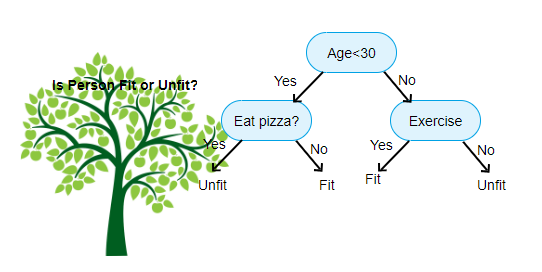

Let's consider a case study using a decision tree to predict whether a patient has diabetes based on health-related features. We'll use the famous Diabetes dataset available in scikit-learn. Here's a simple implementation in Python using scikit-learn:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Create a DataFrame for better visualization
columns = ["Age", "Sex", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]
df = pd.DataFrame(data=np.c_[X, y], columns=columns + ["Target"])  # Add "Target" column for y

# Split the data into features (X) and target variable (y)
X = df.drop("Target", axis=1)  # Exclude the "Target" column as a feature
y = (df["Target"] > df["Target"].median()).astype(int)  # Convert to binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7303370786516854
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74        49
           1       0.67      0.78      0.72        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.74      0.73      0.73        89



### Activity 1: Explain the meaning of GINI values in the tree

Below is the code that draws decision tree obtained from the code above. Each node shows a number of values, such as the number of instances that go into each branch and gini values. 

The meaning of values in each node:
* row 1: feature used to split instances in this node
* row 2: gini value
* row 3: number of samples in this node
* row 4: number of samples with class [no diabeties, yes_diabeties]
* row 5: class

Please study this tree. As you know, if gini value is 0, no further split can be done on that node. However, you might notice, most of the nodes have gini > 0, but the nodes are not split any more. **Explain why.** <br> You may need to look at the code above which is used to construct the tree, and consult the Decision Tree documentation in sklearn.


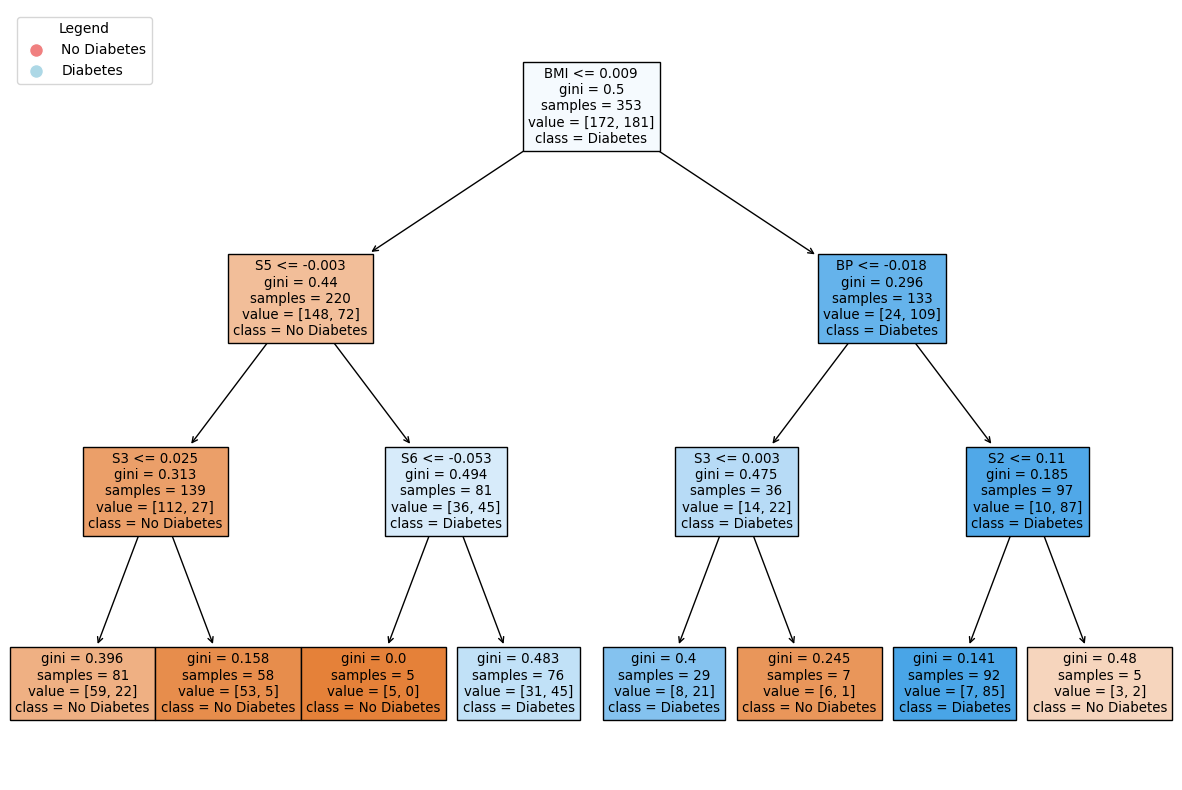

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=list(X.columns), class_names=["No Diabetes", "Diabetes"], ax=ax)

# Create a custom color legend key
colors = {0: 'lightcoral', 1: 'lightblue'}  # Adjust colors as needed
legend_labels = ["No Diabetes", "Diabetes"]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=label)
                  for i, label in enumerate(legend_labels)]

# Place the legend in the upper left corner
ax.legend(handles=legend_handles, loc='upper left', title="Legend")

plt.show()



## Ensemble Methods 

Ensemble methods stand as a powerful paradigm in machine learning, embodying the philosophy that the collective intelligence of multiple models often surpasses the capabilities of any individual model. These techniques harness the diversity and complementary strengths of various algorithms to enhance predictive performance, mitigate overfitting, and foster more robust generalization. Two prominent categories within ensemble methods are Bagging, exemplified by the Random Forest algorithm, which aggregates predictions from an ensemble of independently trained models to mitigate variance, and Boosting, represented by algorithms like AdaBoost and Gradient Boosting, which sequentially build models, each correcting the errors of its predecessor to improve overall accuracy.

The fundamental premise underlying ensemble methods is their ability to transform a group of weak learners—models that may perform only slightly better than random chance—into a robust, high-performing collective. By combining the outputs of these models through mechanisms like averaging, voting, or weighted summation, ensemble methods capitalize on the diversity of individual model errors and strengths, leading to more accurate and resilient predictions. As the landscape of machine learning continues to evolve, ensemble techniques remain a cornerstone, offering a versatile and potent approach to addressing a myriad of real-world prediction challenges.

### Activity 2: Experiments with RandomForest and AdaBoost.

Familiarise yourself and run the following code as is. Then complete the following experiments:
1. Increase or decrease the number of estimators and observe how the accuracy changes. Estimate the number of estimators that maximises the accuracy. It does not have to be an exact number, just a range. Did you find the difference in this number between the RF and AdaBoost? Explain why.
2. Read the documentation of the RF model and explain what bootstrap and max_samples parameter mean.
3. Base on your knowledge from point 2, change the max_samples value between 0.1 and 1.0 (this is default) and observe the effect on accuracy. Explain the difference. 
4. Now, return the sample size back to its the original value, and experiment with the depth of decision tree. Remove the max_depth limitation and check if the performance increased or decreased. Explain why?
5. How does the Random Forest algorithm ensure diversity among its base classifiers?


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Create a DataFrame for better visualization
columns = ["Age", "Sex", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]
df = pd.DataFrame(data=np.c_[X, y], columns=columns + ["Target"])  # Add "Target" column for y

# Split the data into features (X) and target variable (y)
X = df.drop("Target", axis=1)  # Exclude the "Target" column as a feature
y = (df["Target"] > df["Target"].median()).astype(int)  # Convert to binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)

# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)

# Evaluate the models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

print("\nAdaBoost Accuracy:", accuracy_score(y_test, adaboost_predictions))
print("AdaBoost Classification Report:\n", classification_report(y_test, adaboost_predictions))


Random Forest Accuracy: 0.7191011235955056
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89


AdaBoost Accuracy: 0.7078651685393258
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        49
           1       0.68      0.65      0.67        40

    accuracy                           0.71        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.71      0.71      0.71        89



**Loading Data:** The code starts by loading the Iris dataset and considering only the first two features for visualization purposes.

**Splitting Data:** It splits the data into training and testing sets.

**Base Classifier:** It creates a Decision Tree classifier with a maximum depth of 1 as the base classifier. This shallow tree is often referred to as a "decision stump."

**AdaBoost Model:** An AdaBoost model is created using the AdaBoostClassifier with the previously defined decision stump as the base classifier. It specifies the number of weak learners (50 in this case).

**Training:** The AdaBoost model is trained on the training data.

**Prediction and Evaluation:** The model makes predictions on the test set, and its accuracy and classification report are printed.


### Activity 3: Implementation of multilayer Neural Network


#### Acknowledgement: this part of the workshop is based on the lab code from UNSW Machine Learning course lectured by Dr Michael Bain.

Although real-world applications of neural networks are typically based on one of the many special-purpose libraries (such as TensorFlow, PyTorch, etc.) it is possible and instructive to implement at least a basic neural network just using standard Python libraries. We start by implementing some key functions and concepts for a multi-layer neural network. Before coding the fully connected multi-layer neural network, let us code some basic functions needed for  the multi-layer neural network. We will need several libraries later so it is easiest to import them first.

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
from collections import Counter
from functools import partial
import math, random
import numpy as np

#### Implement the following funtions inside the NeuralNetwork class.
1. sigmoid function
2. derivative of the sigmoid function
3. output function for neurons
4. softmax function

#### Optional: How to initialise the network weights?

This function may be harder to implement.
To try, complete the code inside the NeuralNetwork class.
if you succeed, congratulations. <br>
If not, you can find this function at the end of this code. This will let you expriment with NN and continue this activity.

### Implementation

Here is a Neural Network object, providing the ability to define the learning rate, number of epochs/iterations, batch size, the number of layers and the number of neurons in each layer. The default setting of learning_rate, epochs, batch size and neural_numbers are 0.1, 1000, None, and \[10\] respectively. If batch_size is set to be None, that means all samples will be used for training in each iteration. \[10\] means that there is only one hidden layer with 10 neurons. If you want to change the number of hidden layers or the number of neurons, you can change the value of ```neural_numbers```. 

Compare your function code from above with the ones used in this implementation.

In [6]:
class NeuralNetwork(object):
    def __init__(self, learning_rate=0.1, epochs=100, batch_size=None,neural_numbers=[10]):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.neural_numbers=neural_numbers
        self.layers=len(self.neural_numbers)+1
        np.random.seed(77)

    def fit(self,X,y):
        self.X,self.y = X,y
        self.initial_weight()
        self.backpropagate(X,y)
    
    def forward(self,X):
        output_list = []
        input_x = X

        for layer in range(self.layers):

            cur_weight = self.weight_list[layer]
            cur_bias = self.bias_list[layer]
            # Calculate the output for current layer
            output = self.neuron_output(cur_weight,input_x,cur_bias)
            # The current output will be the input for the next layer.
            input_x =  output

            output_list.append(output)
        return output_list

    def backpropagate(self,train_x,train_y):
        acc_list=[]
        for iteration in range(self.epochs):
            if self.batch_size:
                n=train_x.shape[0]
                # Sample batch_size number of sample for n samples
                sample_index=np.random.choice(n, self.batch_size, replace=False)
                x=train_x[sample_index,:]
                y=train_y[sample_index,:]
            else:
                x=train_x
                y=train_y

            output_list=self.forward(x)
            y_pred=output_list.pop()
            # Record the accuracy every 5 iteration.
            if iteration%5==0:
                acc=self.accuracy(self.softmax(y),self.softmax(y_pred))
                acc_list.append(acc)

            loss_last=y-y_pred

            output=y_pred

            for layer in range(self.layers-1,-1,-1):
                if layer!=0:
                    input_last=output_list.pop()
                else:
                    input_last=x

                if layer==self.layers-1:
                    loss,dw,db=self.der_last_layer(loss_last,output,input_last)
                else:
                    weight=self.weight_list[layer+1]
                    loss,dw,db=self.der_hidden_layer(loss_last,output,input_last,weight)

                output=input_last
                self.weight_list[layer] +=dw*self.learning_rate
                self.bias_list[layer] +=db*self.learning_rate
                loss_last=loss
        self.acc_list=acc_list

    def predict(self,X):
        output_list = self.forward(X)
        pred_y = self.softmax(output_list[-1])
        return pred_y

    def accuracy(self, pred, y_test):
        assert len(pred) == len(y_test)
        true_pred=np.where(pred==y_test)
        if true_pred:
            true_n = true_pred[0].shape[0]
            return true_n/len(pred)
        else:
            return 0

    def initial_weight(self):
        if self.X is not None and self.y is not None:
            x=self.X
            y=self.y
            input_dim = x.shape[1]
            output_dim = y.shape[1]

            number_NN = self.neural_numbers+[output_dim]

            weight_list,bias_list = [],[]
            last_neural_number = input_dim     

            for cur_neural_number in number_NN:
                # The dimension of weight matrix is last neural number * current neural number
                weights = np.random.randn(last_neural_number, cur_neural_number)
                # The number of dimension for bias is 1 and the number of current neural
                bias = np.zeros((1, cur_neural_number))

                last_neural_number=cur_neural_number

                weight_list.append(weights)
                bias_list.append(bias)

            self.weight_list=weight_list
            self.bias_list=bias_list

    # Classical sigmoid activation functions are used in every layer in this network
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Derivation of the sigmoid activation function
    def sigmoid_der(self, x):
        return (1 - x) * x

    # Calculate the output for this layer
    def neuron_output(self,w,x,b):
        wx=np.dot(x, w)
        return self.sigmoid( wx + b)

    def der_last_layer(self,loss_last,output,input_x):
        sigmoid_der=self.sigmoid_der(output)
        loss = sigmoid_der*loss_last
        dW = np.dot(input_x.T, loss)
        db = np.sum(loss, axis=0, keepdims=True)
        return loss,dW,db

    def der_hidden_layer(self,loss_last,output,input_x,weight):
        loss = self.sigmoid_der(output) * np.dot(loss_last,weight.T)
        db = np.sum(loss, axis=0, keepdims=True)
        dW = np.dot(input_x.T, loss)
        return loss,dW,db

    def softmax(self,y):
        return np.argmax(y,axis=1)

### How to run the implementation

In [7]:
# Learning_rate=0.05
# nn=NeuralNetwork(learning_rate=Learning_rate)
# nn.fit(inputs,targets)

### Example application: simplified hand-written digit classification

We will use a dataset of simplified "hand-written" digits for classification into one of ten classes (0-9). The representation is in a text format (see below) to make it easy to handle. 

For this dataset the inputs will be a 5x5 matrix of binary "pixels" (0 or 1, represented pictorially as '.' or '1' for input and '.' or '@' for output).

The network structure will be:

25 inputs (pixels)

5 hidden units

10 output units.

The output unit with the largest value will taken as the predicted digit.

We will run the network for 10000 iterations.

In [8]:
raw_digits = [
      """11111
         1...1
         1...1
         1...1
         11111""",

      """..1..
         ..1..
         ..1..
         ..1..
         ..1..""",

      """11111
         ....1
         11111
         1....
         11111""",

      """11111
         ....1
         11111
         ....1
         11111""",

      """1...1
         1...1
         11111
         ....1
         ....1""",

      """11111
         1....
         11111
         ....1
         11111""",

      """11111
         1....
         11111
         1...1
         11111""",

      """11111
         ....1
         ....1
         ....1
         ....1""",

      """11111
         1...1
         11111
         1...1
         11111""",

      """11111
         1...1
         11111
         ....1
         11111"""]

def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]

inputs = np.array(list(map(make_digit, raw_digits)))

targets = np.eye(10)

print(inputs.shape, targets.shape)

(10, 25) (10, 10)


### Experimenting with the implementation

Parameter turning is not that easy in Neural Networks. To see this, let's investigate the relationship between learning rate and accuracy. Below is a function to test the effect of learning rate on accuracy. Run it and it should generate some plots to show the effect.

If you want to try other values for the learning rate, or investigate the effect of other parameters, go ahead and change them and see what happens.

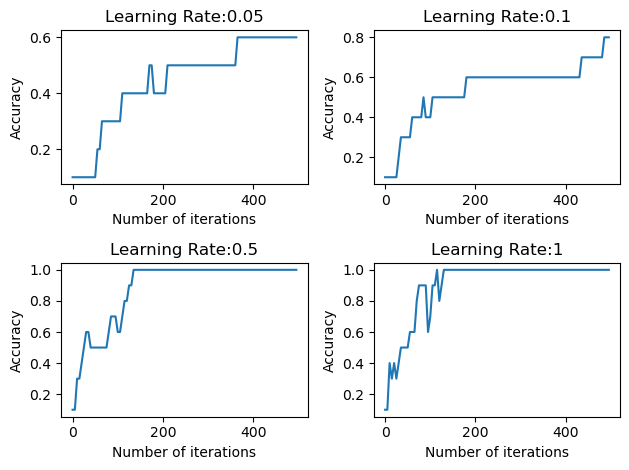

In [9]:
def test_LearnRate(Learning_rate,inputs,targets):
    nn=NeuralNetwork(learning_rate=Learning_rate, epochs=500)
    nn.fit(inputs,targets)
    acc_array=np.array(nn.acc_list)
    plt.plot(np.arange(acc_array.shape[0])*5,acc_array)
    plt.title("Learning Rate:{}".format(Learning_rate))
    plt.ylabel("Accuracy")
    plt.xlabel("Number of iterations")


plt.figure()
plt.subplot(2,2,1)
Learning_rate=0.05
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,2)
Learning_rate=0.1
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,3)
Learning_rate=0.5
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,4)
Learning_rate=1
test_LearnRate(Learning_rate,inputs,targets)
plt.tight_layout()
plt.show()